# <font color="#FA8072">Importing Packages</font>

In [96]:
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt;
import os
import gc
import datetime
import seaborn;
%matplotlib inline

# <font color="#FA8072">Reading File</font>

In [97]:
folderPath = "D:/Rep/MyLearning/articles/24Tutorials/2_LoanPred";

In [98]:
fileName = "train.csv"
filePath = os.path.join(folderPath,fileName)
print("Reading from:" + filePath);

Reading from:D:/Rep/MyLearning/articles/24Tutorials/2_LoanPred\train.csv


In [99]:
df = pd.read_csv(filePath);

# <font color="#FA8072">Summarizing Data </font>

In [100]:
print("Columns are :")
print(df.columns)

Columns are :
Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [101]:
df.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


In [102]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


# <font color="#FA8072">Distribution Analysis </font>

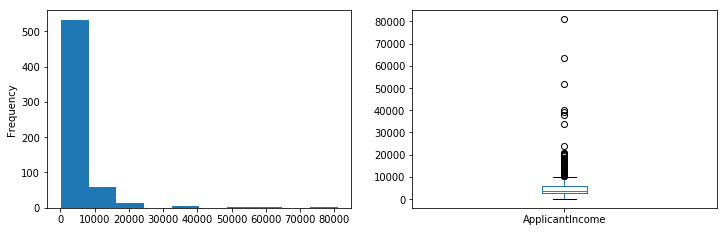

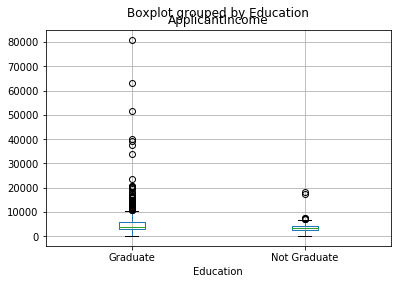

In [103]:
fig = plt.figure(figsize=(12,8));
ax1 = fig.add_subplot(221)
df["ApplicantIncome"].plot(kind='hist')

ax2 = fig.add_subplot(222)
df["ApplicantIncome"].plot(kind='box')

#ax3 = fig.add_subplot(223)
df.boxplot(column='ApplicantIncome',by='Education')

### <font color="#F98866">Categorical Variable Analysis</font>

As we can see two variables Credit History and Loan Status are quite linked together. We can create the probability for getting loan based on Credit History

In [104]:
temp1 = df['Credit_History'].value_counts();
temp2 = df.pivot_table(values="Loan_Status",index="Credit_History",aggfunc=lambda x:x.map({'Y':1,'N':0}).mean());
print('Frequency table for Credit History')
print(temp1)

print('Probability of getting loan for each Credit History class')
print(temp2)

Frequency table for Credit History
1.0    475
0.0     89
Name: Credit_History, dtype: int64
Probability of getting loan for each Credit History class
                Loan_Status
Credit_History             
0.0                0.078652
1.0                0.795789


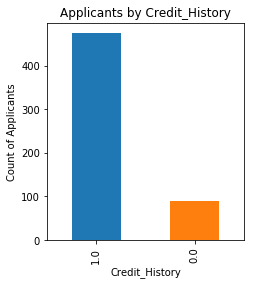

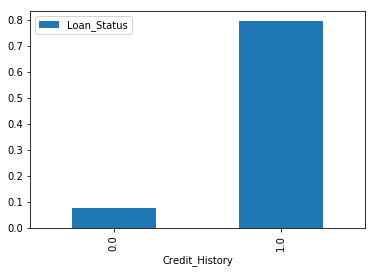

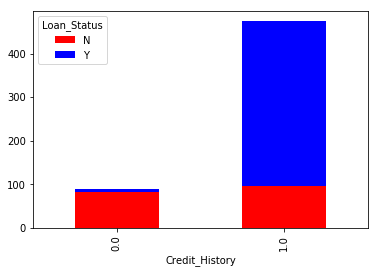

In [105]:
fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(131)
ax1.set_xlabel('Credit_History')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by Credit_History")
temp1.plot(kind='bar')

#ax2 = fig.add_subplot(132)
temp2.plot(kind = 'bar')
ax2.set_xlabel('Credit_History')
ax2.set_ylabel('Probability of getting loan')
ax2.set_title("Probability of getting loan by credit history")

#ax3 = fig.add_subplot(133)
temp3 = pd.crosstab(df['Credit_History'], df['Loan_Status'])
temp3.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

# <font color="#FA8072">Treating Missing Values</font>

Finding Missing Values

In [106]:
df.apply(lambda x:sum(x.isnull()),axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

1. Using Mean/Mode from other values of the columns <br/>
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)
<br><br>
2. Using Supervised learning model to predict loan amount on the basis of other variables
<br><br>
3. Using Static values which are most common

In [107]:
df['Self_Employed'].fillna('No',inplace=True)
df['Gender'].fillna('Male',inplace=True)
df['Married'].fillna('Yes',inplace=True)
df['Dependents'].fillna('0',inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(),inplace=True)
df['Credit_History'].fillna(1.0,inplace=True)

<p>4. Using values of other columns to compute null value</p>

In [108]:
table = df.pivot_table(values='LoanAmount', index='Self_Employed' ,columns='Education', aggfunc=np.median)
# Define function to return value of this pivot_table
def fage(x):
    return table.loc[x['Self_Employed'],x['Education']]
# Replace missing values
df['LoanAmount'].fillna(df[df['LoanAmount'].isnull()].apply(fage, axis=1), inplace=True)

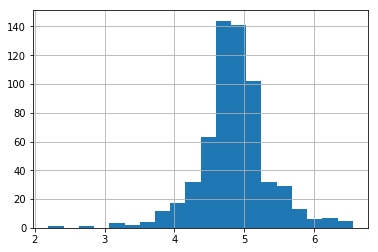

In [109]:
df['LoanAmount_log'] = np.log(df['LoanAmount'])
df['LoanAmount_log'].hist(bins=20)

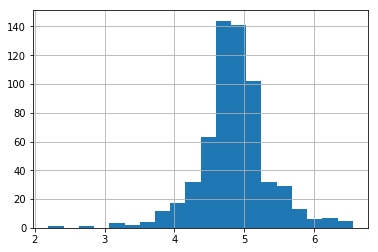

In [110]:
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['TotalIncome_log'] = np.log(df['TotalIncome'])
df['LoanAmount_log'].hist(bins=20) 

# <font color="#FA8072">Building Preditive Models</font> 

In [111]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])
df.dtypes

Loan_ID               object
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
LoanAmount_log       float64
TotalIncome          float64
TotalIncome_log      float64
dtype: object

In [112]:
#Import models from scikit learn module:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold   #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

In [113]:
#Generic function for making a classification model and accessing performance:
def classification_model(model, data, predictors, outcome):
    #Fit the model:
    model.fit(data[predictors],data[outcome])
    #Make predictions on training set:
    predictions = model.predict(data[predictors])
    #Print accuracy
    accuracy = metrics.accuracy_score(predictions,data[outcome])
    print("Accuracy : %s" % "{0:.3%}".format(accuracy))

    #Perform k-fold cross-validation with 5 folds
    kf = KFold(data.shape[0], n_folds=5)
    error = []
    for train, test in kf:
        # Filter training data
        train_predictors = (data[predictors].iloc[train,:])
    
        # The target we're using to train the algorithm.
        train_target = data[outcome].iloc[train]
    
        # Training the algorithm using the predictors and target.
        model.fit(train_predictors, train_target)
    
        #Record error from each cross-validation run
        error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
 
        print("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))

        #Fit the model again so that it can be refered outside the function:
        model.fit(data[predictors],data[outcome]) 

#### <font color="F98866">1. Logistic Regression</font>

In [114]:
outcome_var = 'Loan_Status'
model = LogisticRegression()
predictor_var = ['Credit_History']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 80.945%
Cross-Validation Score : 80.488%
Cross-Validation Score : 78.455%
Cross-Validation Score : 79.133%
Cross-Validation Score : 80.691%
Cross-Validation Score : 80.946%


In [115]:
#We can try different combination of variables:
predictor_var = ['Credit_History','Education','Married','Self_Employed','Property_Area']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 80.945%
Cross-Validation Score : 80.488%
Cross-Validation Score : 78.455%
Cross-Validation Score : 79.133%
Cross-Validation Score : 80.691%
Cross-Validation Score : 80.946%


#### <font color="#F98866">2. Decision Tree</font> 

In [116]:
model = DecisionTreeClassifier()
predictor_var = ['Credit_History','Gender','Married','Education']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 80.945%
Cross-Validation Score : 80.488%
Cross-Validation Score : 78.455%
Cross-Validation Score : 79.133%
Cross-Validation Score : 80.691%
Cross-Validation Score : 80.946%


In [117]:
#We can try different combination of variables:
predictor_var = ['Credit_History','Loan_Amount_Term','LoanAmount_log']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 88.925%
Cross-Validation Score : 73.171%
Cross-Validation Score : 71.138%
Cross-Validation Score : 69.648%
Cross-Validation Score : 70.325%
Cross-Validation Score : 68.883%


#### <font color="#F98866">3. Random Forest</font>

In [118]:
model = RandomForestClassifier(n_estimators=100)
predictor_var = ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
        'LoanAmount_log','TotalIncome_log']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 100.000%
Cross-Validation Score : 75.610%
Cross-Validation Score : 74.390%
Cross-Validation Score : 75.881%
Cross-Validation Score : 77.033%
Cross-Validation Score : 77.528%


Here we see that the accuracy is 100% for the training set. This is the ultimate case of overfitting and can be resolved in two ways:
<br/>
1. Reducing the number of predictors
2. Tuning the model parameters

In [119]:
#Create a series with feature importances:
featimp = pd.Series(model.feature_importances_, index=predictor_var).sort_values(ascending=False)
print(featimp)

Credit_History      0.264870
TotalIncome_log     0.264422
LoanAmount_log      0.230219
Dependents          0.054872
Property_Area       0.049054
Loan_Amount_Term    0.045617
Married             0.025634
Education           0.022915
Self_Employed       0.021993
Gender              0.020404
dtype: float64


In [120]:
model = RandomForestClassifier(n_estimators=25, min_samples_split=25, max_depth=7, max_features=1)
predictor_var = ['TotalIncome_log','LoanAmount_log','Credit_History','Dependents','Property_Area']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 83.062%
Cross-Validation Score : 78.862%
Cross-Validation Score : 75.610%
Cross-Validation Score : 77.778%
Cross-Validation Score : 79.878%
Cross-Validation Score : 80.296%


#### <font color="#F98866">4. XG Boost</font> 

In [121]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [122]:
# fit model no training data
model = XGBClassifier()
predictor_var = ['TotalIncome_log','LoanAmount_log','Credit_History','Dependents','Property_Area']
model.fit(df[predictor_var], df[outcome_var])

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [124]:
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 85.505%
Cross-Validation Score : 80.488%
Cross-Validation Score : 78.455%
Cross-Validation Score : 79.675%
Cross-Validation Score : 80.285%
Cross-Validation Score : 80.457%


# <font color="#80BD9E">Predictions</font>

In [125]:
testFileName = "test.csv"
testFilePath = os.path.join(folderPath,testFileName)
print("Reading from:" + testFilePath);

Reading from:D:/Rep/MyLearning/articles/24Tutorials/2_LoanPred\test.csv


In [126]:
dfTest = pd.read_csv(testFilePath)

In [128]:
dfTest.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
5,LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban
6,LP001055,Female,No,1,Not Graduate,No,2226,0,59.0,360.0,1.0,Semiurban
7,LP001056,Male,Yes,2,Not Graduate,No,3881,0,147.0,360.0,0.0,Rural
8,LP001059,Male,Yes,2,Graduate,NaN,13633,0,280.0,240.0,1.0,Urban
9,LP001067,Male,No,0,Not Graduate,No,2400,2400,123.0,360.0,1.0,Semiurban


In [129]:
dfTest['Self_Employed'].fillna('No',inplace=True)
dfTest['Gender'].fillna('Male',inplace=True)
dfTest['Married'].fillna('Yes',inplace=True)
dfTest['Dependents'].fillna('0',inplace=True)
dfTest['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(),inplace=True)
dfTest['Credit_History'].fillna(1.0,inplace=True)

In [130]:
# Replace missing values
dfTest['LoanAmount'].fillna(dfTest[dfTest['LoanAmount'].isnull()].apply(fage, axis=1), inplace=True)

In [131]:
dfTest['LoanAmount_log'] = np.log(dfTest['LoanAmount'])
dfTest['TotalIncome'] = dfTest['ApplicantIncome'] + dfTest['CoapplicantIncome']
dfTest['TotalIncome_log'] = np.log(dfTest['TotalIncome'])

In [133]:
var_mod = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area']
for i in var_mod:
    dfTest[i] = le.fit_transform(dfTest[i])

In [134]:
predictor_var_Test = ['TotalIncome_log','LoanAmount_log','Credit_History','Dependents','Property_Area']
dfTest["Loan_Status"] = model.predict(dfTest[predictor_var_Test])

In [136]:
dfTest[["Loan_ID","Loan_Status"]].to_csv(os.path.join(folderPath,"Loan_Prediction_Sol_29072018.csv"),index=False)

# <font color="#80BD9E">Help Links</font>

In [20]:
#https://www.analyticsvidhya.com/blog/2016/01/complete-tutorial-learn-data-science-python-scratch-2/
#http://pandas.pydata.org/pandas-docs/stable/10min.html